In [1]:
!pip install praw pandas matplotlib seaborn tqdm ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 8.5 MB/s eta 0:00:00


In [ ]:
import praw

#
reddit = praw.Reddit(
    client_id="REDACTED",
    client_secret="REDACTED",
    user_agent="Reddit Data Science Project"
)

In [6]:
import pandas as pd
import os
import json
from tqdm import tqdm

# Target flairs (as used in the subreddit)
target_flairs = [
    "Investering",
    "Skat",
    "Privatøkonomi",
    "Job",
    "Bil",
    "Lønseddel",
    "Bolig"
]

# File name for cached dataset
json_path = "sample_data/dkfinance_posts.json"

if os.path.exists(json_path):
    print(f"Loading existing dataset from {json_path}...")
    df = pd.read_json(json_path)
else:
    print("Collecting posts from Reddit API...")

    subreddit = reddit.subreddit("dkfinance")
    all_posts = []

    # Collect top posts per flair
    for flair in tqdm(target_flairs, desc="Collecting posts by flair"):
        for post in subreddit.search(f"flair:{flair}", sort="top", limit=200):
            all_posts.append({
                "flair": post.link_flair_text,
                "title": post.title,
                "selftext": post.selftext,
                "score": post.score,
                "num_comments": post.num_comments,
                "created_utc": post.created_utc,
                "url": post.url
            })

    df = pd.DataFrame(all_posts)

    # Basic cleanup
    df["text"] = df["title"].fillna('') + " " + df["selftext"].fillna('')
    df = df[df["flair"].isin(target_flairs)]
    df = df[df["text"].str.strip() != ""]
    df.reset_index(drop=True, inplace=True)

    # Export to JSON for caching
    df.to_json(json_path, orient="records", indent=2, force_ascii=False)
    print(f"Dataset saved to {json_path}")

print(f"Loaded {len(df)} posts across {df['flair'].nunique()} flairs.")
df["flair"].value_counts()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

Dataset saved to sample_data/dkfinance_posts.json
Loaded 1400 posts across 7 flairs.


,count
flair,
Investering,200
Skat,200
Privatøkonomi,200
Job,200
Bil,200
Lønseddel,200
Bolig,200


Basic dataset overview:
             score  num_comments   text_length
count  1400.000000   1400.000000   1400.000000
mean     58.254286     80.180000    806.400000
std      88.003117     73.003611   1169.244348
min       2.000000      0.000000      4.000000
25%      17.000000     30.000000    208.500000
50%      33.000000     60.000000    553.000000
75%      65.000000    105.000000   1010.500000
max    1165.000000    601.000000  28170.000000


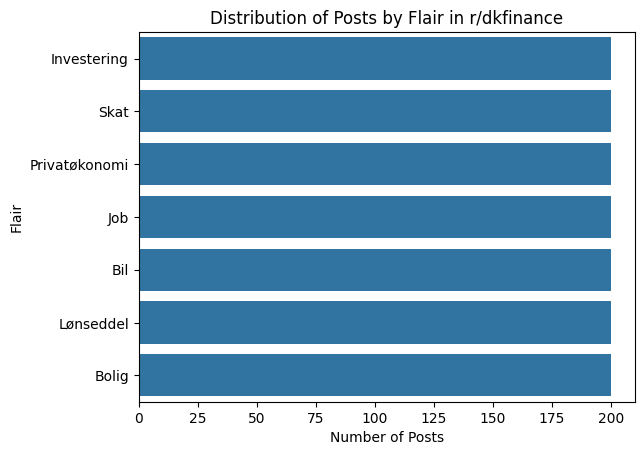

                 score  num_comments
flair                               
Privatøkonomi  130.785       140.110
Investering     78.550        79.695
Job             52.130        85.615
Lønseddel       47.320        49.090
Bolig           47.245        89.150
Skat            33.890        51.330
Bil             17.860        66.270


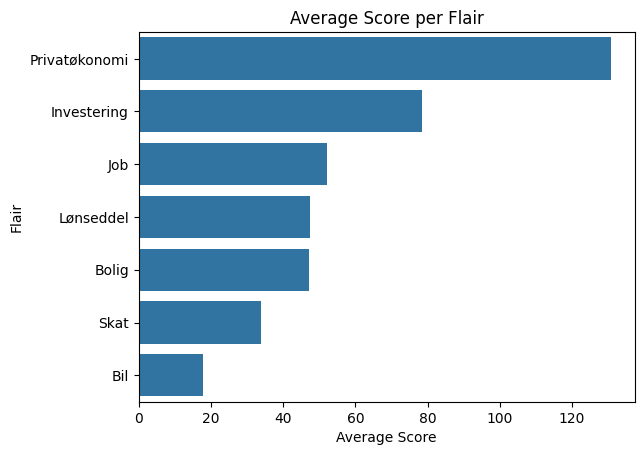

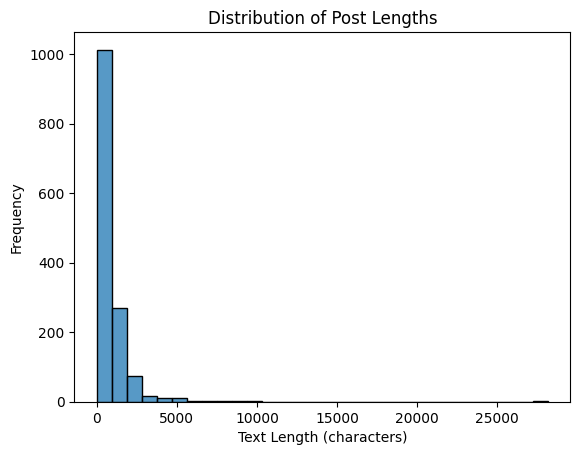

In [7]:

df["text_length"] = df["text"].apply(len)

print("Basic dataset overview:")
print(df[["score", "num_comments", "text_length"]].describe())

import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of posts per flair
sns.countplot(y="flair", data=df, order=df["flair"].value_counts().index)
plt.title("Distribution of Posts by Flair in r/dkfinance")
plt.xlabel("Number of Posts")
plt.ylabel("Flair")
plt.show()

# Average engagement per flair
flair_stats = df.groupby("flair")[["score", "num_comments"]].mean().sort_values("score", ascending=False)
print(flair_stats)

sns.barplot(x=flair_stats["score"], y=flair_stats.index)
plt.title("Average Score per Flair")
plt.xlabel("Average Score")
plt.ylabel("Flair")
plt.show()

# Text length distribution
sns.histplot(df["text_length"], bins=30)
plt.title("Distribution of Post Lengths")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [8]:
#Totally stolen, MB Roman

# Scikit-learn for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Sentence Transformers for embeddings
from sentence_transformers import SentenceTransformer

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

In [16]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords_dk = stopwords.words('danish')
except LookupError:
    nltk.download('stopwords')
    stopwords_dk = stopwords.words('danish')

# data prep

# Combine title and selftext into a single feature, convert to lowercase, remove whitespace and newlines, remove URLs and stop words
df['text'] = df['title'].fillna('') + " " + df['selftext'].fillna('')
df['text'] = df['text'].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove URLs
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove Danish stop words
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_dk]))


print(f"Dataset shape: {df.shape}")
# Displaying the first few rows of the 'text' column and 'flair' (label)
print(df[['text', 'flair']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset shape: (1400, 9)
                                                text        flair
0                                                atp  Investering
1  novo infiltrerer tiktok forskellen vores nuvær...  Investering
2  stopper arbejde :) 60 år juli, arbejdet meget,...  Investering
3  scammet herinde. nå.. næsten flov skrive herin...  Investering
4  blevet fuldstændig sindssyge madpriser danmark...  Investering


In [17]:
#Splitting into train test set
X = df['text']
y = df['flair']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1050,)
X_test shape: (350,)
y_train shape: (1050,)
y_test shape: (350,)


In [18]:
#blatantly borrowed:

#| label: tfidf-pipeline

# --- Pipeline with Logistic Regression ---
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('clf', LogisticRegression(random_state=42, max_iter=1000)),
])

# --- Pipeline with SVM ---
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 2))),
    ('clf', SVC(random_state=42, kernel='linear', C=1.0)),
])

# Train models
print("Training TF-IDF + Logistic Regression...")
pipeline_lr.fit(X_train, y_train)

print("Training TF-IDF + SVM...")
pipeline_svm.fit(X_train, y_train)

# Evaluate models
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)

# Store results
results = {}
results['TF-IDF + Logistic Regression'] = accuracy_score(y_test, y_pred_lr)
results['TF-IDF + SVM'] = accuracy_score(y_test, y_pred_svm)

print("\n--- TF-IDF + Logistic Regression Results ---")
print(f"Accuracy: {results['TF-IDF + Logistic Regression']:.4f}")
print(classification_report(y_test, y_pred_lr))

print("\n--- TF-IDF + SVM Results ---")
print(f"Accuracy: {results['TF-IDF + SVM']:.4f}")
print(classification_report(y_test, y_pred_svm))

Training TF-IDF + Logistic Regression...
Training TF-IDF + SVM...

--- TF-IDF + Logistic Regression Results ---
Accuracy: 0.7629
               precision    recall  f1-score   support

          Bil       0.92      0.88      0.90        50
        Bolig       0.80      0.82      0.81        50
  Investering       0.64      0.78      0.70        50
          Job       0.80      0.78      0.79        50
    Lønseddel       0.85      0.82      0.84        50
Privatøkonomi       0.63      0.62      0.63        50
         Skat       0.73      0.64      0.68        50

     accuracy                           0.76       350
    macro avg       0.77      0.76      0.76       350
 weighted avg       0.77      0.76      0.76       350


--- TF-IDF + SVM Results ---
Accuracy: 0.7600
               precision    recall  f1-score   support

          Bil       0.93      0.84      0.88        50
        Bolig       0.79      0.84      0.82        50
  Investering       0.67      0.76      0.71      

In [19]:
#blatantly borrowing:

# Load a pre-trained SBERT model
print("Loading SBERT model...")
embedding_model = SentenceTransformer('intfloat/multilingual-e5-small')

# Generate embeddings (this can take a moment)
print("Generating embeddings for training data...")
X_train_embeddings = embedding_model.encode(X_train.tolist(), show_progress_bar=True)

print("Generating embeddings for test data...")
X_test_embeddings = embedding_model.encode(X_test.tolist(), show_progress_bar=True)

print(f"Shape of training embeddings: {X_train_embeddings.shape}")

# --- Train classifiers on embeddings ---
# Logistic Regression
print("\nTraining SBERT + Logistic Regression...")
clf_lr_sbert = LogisticRegression(random_state=42, max_iter=1000)
clf_lr_sbert.fit(X_train_embeddings, y_train)

# SVM
print("Training SBERT + SVM...")
clf_svm_sbert = SVC(random_state=42, kernel='linear', C=1.0)
clf_svm_sbert.fit(X_train_embeddings, y_train)

# Evaluate models
y_pred_lr_sbert = clf_lr_sbert.predict(X_test_embeddings)
y_pred_svm_sbert = clf_svm_sbert.predict(X_test_embeddings)

# Store results
results['SBERT + Logistic Regression'] = accuracy_score(y_test, y_pred_lr_sbert)
results['SBERT + SVM'] = accuracy_score(y_test, y_pred_svm_sbert)

print("\n--- SBERT + Logistic Regression Results ---")
print(f"Accuracy: {results['SBERT + Logistic Regression']:.4f}")
print(classification_report(y_test, y_pred_lr_sbert))

print("\n--- SBERT + SVM Results ---")
print(f"Accuracy: {results['SBERT + SVM']:.4f}")
print(classification_report(y_test, y_pred_svm_sbert))

Loading SBERT model...
Generating embeddings for training data...


Batches:   0%|          | 0/33 [00:00<?, ?it/s]

Generating embeddings for test data...


Batches:   0%|          | 0/11 [00:00<?, ?it/s]

Shape of training embeddings: (1050, 384)

Training SBERT + Logistic Regression...
Training SBERT + SVM...

--- SBERT + Logistic Regression Results ---
Accuracy: 0.7743
               precision    recall  f1-score   support

          Bil       0.90      0.94      0.92        50
        Bolig       0.83      0.90      0.87        50
  Investering       0.67      0.74      0.70        50
          Job       0.73      0.82      0.77        50
    Lønseddel       0.85      0.80      0.82        50
Privatøkonomi       0.78      0.56      0.65        50
         Skat       0.66      0.66      0.66        50

     accuracy                           0.77       350
    macro avg       0.78      0.77      0.77       350
 weighted avg       0.78      0.77      0.77       350


--- SBERT + SVM Results ---
Accuracy: 0.7800
               precision    recall  f1-score   support

          Bil       0.92      0.94      0.93        50
        Bolig       0.83      0.86      0.84        50
  Investeri

In [20]:
#blatantly borrowing:

#| label: results-summary

results_df = pd.DataFrame(
    list(results.items()),
    columns=['Model', 'Accuracy']
).sort_values('Accuracy', ascending=False)

print(results_df.to_markdown(index=False))

| Model                        |   Accuracy |
|:-----------------------------|-----------:|
| SBERT + SVM                  |   0.78     |
| SBERT + Logistic Regression  |   0.774286 |
| TF-IDF + Logistic Regression |   0.762857 |
| TF-IDF + SVM                 |   0.76     |


So I redid it with stopwords. This is before stopwords:



| Model                        |   Accuracy |
|:-----------------------------|-----------:|
| SBERT + SVM                  |   0.785714 |
| SBERT + Logistic Regression  |   0.771429 |
| TF-IDF + SVM                 |   0.705714 |
| TF-IDF + Logistic Regression |   0.671429 |


and above is after. It increased the TF-IDF models substantially, while lowering SBERT a little bit.

Cool, lets try and see how good an LLM would be.

In [21]:
# Install Ollama runtime
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [22]:
import subprocess, time
os.environ['PATH'] += ':/usr/local/cuda/bin'
os.environ['LD_LIBRARY_PATH'] = '/usr/lib64-nvidia:/usr/local/cuda/lib64'
subprocess.Popen(["ollama","serve"])
time.sleep(3)

In [46]:
def start_ollama():
    """Starts the Ollama server and waits for it to become ready."""
    import subprocess, time, requests
    # Start the server as a background process
    p = subprocess.Popen(["ollama", "serve"])
    print("🚀 Starting Ollama server...")
    # Poll the API endpoint until it's ready
    for _ in range(30):
        try:
            r = requests.get("http://localhost:11434/api/tags", timeout=1)
            if r.status_code == 200:
                print("✅ Ollama server is live and ready.")
                return p
        except (requests.exceptions.ConnectionError, requests.exceptions.ReadTimeout):
            time.sleep(1)
    raise RuntimeError("Ollama server did not start within the expected time.")

# Start the server
server_process = start_ollama()

# NOTE on GPU VRAM:
# The qwen3:latest model (~5GB quantized) runs comfortably on a T4 GPU with 16GB VRAM.
# If you encounter out-of-memory errors, you can switch MODEL_NAME to "qwen3:4b".

🚀 Starting Ollama server...
✅ Ollama server is live and ready.


By now, I shouldn't have any models loaded, but lets check.

In [47]:
#| output: true
print("--- Installed Models (Before Pull) ---")
!ollama list

--- Installed Models (Before Pull) ---
NAME              ID              SIZE      MODIFIED          
mistral:latest    6577803aa9a0    4.4 GB    About an hour ago    


To represent europe, ill try mistral

In [25]:
!ollama pull mistral

In [27]:
# Verify that the model is now available locally
print(f"\n--- Installed Models (After Pull) ---")
!ollama list

#I'll save it as model name
MODEL_NAME ="mistral:latest"


--- Installed Models (After Pull) ---
NAME              ID              SIZE      MODIFIED           
mistral:latest    6577803aa9a0    4.4 GB    About a minute ago    


In [29]:
import ollama
hello_resp = ollama.chat(
    model=MODEL_NAME,
    messages=[{"role": "user", "content": "Say hello in one short sentence."}],
    stream=False
)

print(hello_resp["message"]["content"])

 Hello there! How can I help you today?


that was slow af tbh

In [30]:
from typing import Optional, Literal
from pydantic import BaseModel, Field, ValidationError

# Define the allowed target flairs
TARGET_FLAIRS = [
    "Investering",
    "Skat",
    "Privatøkonomi",
    "Job",
    "Bil",
    "Lønseddel",
    "Bolig"
]

class SingleLabelPrediction(BaseModel):
    predicted_label: Literal[
        "Investering",
        "Skat",
        "Privatøkonomi",
        "Job",
        "Bil",
        "Lønseddel",
        "Bolig"
    ] = Field(description="Den bedst passende flair for opslaget.")

def analyze_post_zero_shot(post: dict) -> Optional[str]:
    """Analyserer et opslag ved hjælp af zero-shot klassifikation og returnerer den forudsagte flair."""
    system_prompt = (
        "Du klassificerer opslag fra et dansk forum i én af de følgende flairs: "
        f"{TARGET_FLAIRS}. "
        "Du SKAL returnere gyldig JSON med præcis ét felt: 'predicted_label'. "
        "Inkluder ikke forklaringer, tekst eller markdown."
    )

    user_prompt = f"Analyser dette opslag:\n\nTitel: {post['title']}\n\nTekst: {post['selftext']}"

    try:
        response = ollama.chat(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt},
            ],
            format=SingleLabelPrediction.model_json_schema(),  # Enforce JSON schema
            stream=False,
            think=False
        )
        raw_json = response["message"]["content"]
        result = SingleLabelPrediction.model_validate_json(raw_json)
        return result.predicted_label

    except (ValidationError, json.JSONDecodeError, KeyError) as e:
        print(f"Fejl under behandling af opslag '{post['title']}': {e}")
        return None


Ill start with just a few posts, but they are ordered by category atm, and stupidly cleaned stopwords previously. Will load top 10 for each category using cached data.

In [35]:

# Load the data from the JSON file
json_path = "sample_data/dkfinance_posts.json"
with open(json_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df_llm = pd.DataFrame(data)

# Group by flair and select the first 10 posts from each group
df_llm_sample = df_llm.groupby('flair').head(10).reset_index(drop=True)

# Create a new column 'textjoined' with combined and cleaned text
df_llm_sample['textjoined'] = df_llm_sample['title'].fillna('') + " " + df_llm_sample['selftext'].fillna('')
df_llm_sample['textjoined'] = df_llm_sample['textjoined'].str.lower().str.replace(r'\s+', ' ', regex=True).str.strip()

# Remove URLs from 'textjoined'
df_llm_sample['textjoined'] = df_llm_sample['textjoined'].apply(lambda x: re.sub(r'http\S+', '', x))

print(f"Loaded {len(df_llm_sample)} sample posts across {df_llm_sample['flair'].nunique()} flairs.")
print(df_llm_sample[['title','selftext', 'flair', 'textjoined']].head())

Loaded 70 sample posts across 7 flairs.
                                               title  \
0                                                ATP   
1                Novo infiltrerer nu også min tiktok   
2                      Jeg stopper med at arbejde :)   
3                          Jeg blev scammet herinde.   
4  Er vi blevet fuldstændig sindssyge med de madp...   

                                            selftext        flair  \
0                                                     Investering   
1  \nHvad er forskellen på vores nuværende positi...  Investering   
2  Jeg bliver 60 år til juli, har arbejdet meget,...  Investering   
3  Nå.. jeg har næsten været for flov til at skri...  Investering   
4  Jeg handlede lige lidt helt almindeligt ind i ...  Investering   

                                          textjoined  
0                                                atp  
1  novo infiltrerer nu også min tiktok hvad er fo...  
2  jeg stopper med at arbejde :) jeg bliver

In [49]:
predictions = []
# Iterate through the rows of the sampled dataframe
for index, row in tqdm(df_llm_sample.iterrows(), total=len(df_llm_sample), desc="Zero-Shot Classification"):
    # Create a dictionary for the post with the necessary keys
    post = {
        "title": row["title"],
        "selftext": row["selftext"],
        "label": row["flair"] # Use 'flair' as the true label
    }
    predicted = analyze_post_zero_shot(post)
    predictions.append({
        "title": post["title"],
        "true_label": post["label"],
        "predicted_label": predicted if predicted else "Error"
    })

df_baseline = pd.DataFrame(predictions)
df_baseline_valid = df_baseline[df_baseline.predicted_label != "Error"]

print("\n--- 📊 Baseline Zero-Shot Results ---")
display(df_baseline_valid)

y_true = df_baseline_valid['true_label']
y_pred = df_baseline_valid['predicted_label']

# Define CATEGORIES based on unique flairs in the valid predictions
CATEGORIES = sorted(df_baseline_valid['true_label'].unique())


print(f"\n--- 🎯 Baseline Performance ---")
print(f"Overall Accuracy: {accuracy_score(y_true, y_pred):.2%}\n")
print("Classification Report:")
# Use zero_division=0 to avoid warnings if some classes have no predictions
print(classification_report(y_true, y_pred, labels=CATEGORIES, zero_division=0))

Zero-Shot Classification: 100%|██████████| 70/70 [01:25<00:00,  1.22s/it]


--- 📊 Baseline Zero-Shot Results ---


,title,true_label,predicted_label
0,ATP,Investering,Skat
1,Novo infiltrerer nu også min tiktok,Investering,Privatøkonomi
2,Jeg stopper med at arbejde :),Investering,Privatøkonomi
3,Jeg blev scammet herinde.,Investering,Skat
4,Er vi blevet fuldstændig sindssyge med de madp...,Investering,Privatøkonomi
...,...,...,...
65,Boligejere på dkfinance...,Bolig,Bolig
66,"Antal bolighandler i Danmark, 2008 - 2023",Bolig,Bolig
67,Kan det betale sig at eje hvis man...,Bolig,Bolig
68,Voldsom stigning: Flere unge boligejere har su...,Bolig,Bolig



--- 🎯 Baseline Performance ---
Overall Accuracy: 68.57%

Classification Report:
               precision    recall  f1-score   support

          Bil       1.00      0.90      0.95        10
        Bolig       0.90      0.90      0.90        10
  Investering       0.50      0.10      0.17        10
          Job       0.67      0.40      0.50        10
    Lønseddel       1.00      0.50      0.67        10
Privatøkonomi       0.45      1.00      0.62        10
         Skat       0.62      1.00      0.77        10

     accuracy                           0.69        70
    macro avg       0.74      0.69      0.65        70
 weighted avg       0.74      0.69      0.65        70



I'll try and improve it, using minimal analysis and few-shot with about 2 posts per category.

In [38]:
CATEGORY_MAP = {name: i for i, name in enumerate(TARGET_FLAIRS)}
ID_TO_CATEGORY = {i: name for name, i in CATEGORY_MAP.items()}

class MinimalAnalysis(BaseModel):
    """Minimal schema for fast classification using an integer ID."""
    category_id: int = Field(
        description="An integer from 0-7 representing the category.",
        ge=0,
        le=len(CATEGORIES) - 1
    )

In [ ]:
#Generating a few example posts for the fewshot classifier


In [39]:
# Prepare few-shot examples (2 posts per flair)
few_shot_examples = []
for flair in df_llm_sample['flair'].unique():
    # Select the first 2 posts for each flair
    examples = df_llm_sample[df_llm_sample['flair'] == flair].head(2)
    for index, row in examples.iterrows():
        few_shot_examples.append({
            "title": row["title"],
            "selftext": row["selftext"],
            "flair": row["flair"]
        })

print("--- Few-Shot Examples ---")
for example in few_shot_examples:
    print(f"Flair: {example['flair']}")
    print(f"Title: {example['title']}")
    print(f"Selftext: {example['selftext'][:200]}...") # Print only first 200 characters of selftext
    print("-" * 20)

--- Few-Shot Examples ---
Flair: Investering
Title: ATP
Selftext: ...
--------------------
Flair: Investering
Title: Novo infiltrerer nu også min tiktok
Selftext: 
Hvad er forskellen på vores nuværende position og Finlands Nokia problem...
--------------------
Flair: Skat
Title: I Australien kan man se, hvad ens skattekroner går til. Bør DK indføre det?
Selftext: ...
--------------------
Flair: Skat
Title: Is this a fucking joke?
Selftext: Jeg har så mange spørgsmål. 
0,05 kr. i gæld for hvad? 
Opfandt de et tal for at retfærdiggøre, at de ikke fandt noget, de kunne tage fra mig? ...
--------------------
Flair: Privatøkonomi
Title: Jeg er endeligt gældsfri
Selftext: Jeg er en 27 årig mand, der havde en samlet gæld på 119,373 kr, da de begyndte at indeholde dele af min løn tilbage i marts. På daværende tidspunkt havde jeg været i et forholdevist stort hash misbrug...
--------------------
Flair: Privatøkonomi
Title: Den virkelig normale verden
Selftext: Nu har jeg luret i en del tid, men

In [48]:
# We hand-label one good training example.
# Let's use the "My sister copies everything I do" post.
# example_post = few_shot_examples[0]
# example_label_id = CATEGORY_MAP[example_post['label']]

def analyze_post_fewshot(post: dict) -> Optional[int]:
    """Classifies a post using few-shot guidance and integer output."""
    system_prompt = (
        "You are an efficient classification system. Your task is to analyze a post "
        "and return a JSON object with a single integer: 'category_id'. "
        "Use the provided mappings and follow the examples. Do not output anything else."
    )

    # Build the few-shot examples part of the prompt
    few_shot_prompt_examples = ""
    flairs_added = {}
    for example in few_shot_examples:
        flair = example['flair']
        if flair not in flairs_added or flairs_added[flair] < 2:
            example_label_id = CATEGORY_MAP[flair]
            few_shot_prompt_examples += f"""
--- PERFECT EXAMPLE ---
INPUT POST:
Title: {example['title']}
Text: {example['selftext']}

JSON OUTPUT:
{{"category_id": {example_label_id}}}
"""
            flairs_added[flair] = flairs_added.get(flair, 0) + 1
        if len(flairs_added) == len(TARGET_FLAIRS) and all(count >= 2 for count in flairs_added.values()):
            break # Stop if we have two examples for all target flairs


    user_prompt = f"""
--- MAPPINGS ---
Categories: {json.dumps(CATEGORY_MAP, indent=2)}

{few_shot_prompt_examples}

--- NEW POST TO ANALYZE ---
INPUT POST:
Title: {post['title']}
Text: {post['selftext']}

JSON OUTPUT:
"""
    try:
        response = ollama.chat(
            model=MODEL_NAME,
            messages=[
                {'role': 'system', 'content': system_prompt},
                {'role': 'user', 'content': user_prompt}
            ],
            # Pydantic v2 uses model_json_schema() instead of schema()
            format=MinimalAnalysis.model_json_schema(), # Enforce the minimal schema
            stream=False,
            # think=False # Removed as per previous modification
        )
        raw_json = response['message']['content']
        # Pydantic v2 uses model_validate_json() instead of parse_raw()
        result = MinimalAnalysis.model_validate_json(raw_json)
        return result.category_id
    except (ValidationError, json.JSONDecodeError, KeyError) as e:
        print(f"Error processing post '{post['title']}': {e}")
        return None

In [50]:

predictions = []
# Iterate through the rows of the sampled dataframe
for index, row in tqdm(df_llm_sample.iterrows(), total=len(df_llm_sample), desc="Few-Shot Classification"):
    # Create a dictionary for the post with the necessary keys
    post = {
        "title": row["title"],
        "selftext": row["selftext"],
        "label": row["flair"] # Use 'flair' as the true label
    }
    # Use the few-shot analysis function
    predicted_id = analyze_post_fewshot(post)

    # Map the predicted ID back to the flair name
    predicted_label = ID_TO_CATEGORY.get(predicted_id, "Error") # Use .get() with a default for safety


    predictions.append({
        "title": post["title"],
        "true_label": post["label"],
        "predicted_label": predicted_label
    })

df_fewshot_baseline = pd.DataFrame(predictions) # Use a new variable name
df_fewshot_valid = df_fewshot_baseline[df_fewshot_baseline.predicted_label != "Error"]

print("\n--- 📊 Few-Shot Baseline Results ---")
display(df_fewshot_valid)

y_true_fewshot = df_fewshot_valid['true_label']
y_pred_fewshot = df_fewshot_valid['predicted_label']

# Define CATEGORIES based on unique flairs in the valid predictions
CATEGORIES_fewshot = sorted(df_fewshot_valid['true_label'].unique())


print(f"\n--- 🎯 Few-Shot Baseline Performance ---")
print(f"Overall Accuracy: {accuracy_score(y_true_fewshot, y_pred_fewshot):.2%}\n")
print("Classification Report:")
# Use zero_division=0 to avoid warnings if some classes have no predictions
print(classification_report(y_true_fewshot, y_pred_fewshot, labels=CATEGORIES_fewshot, zero_division=0))

Few-Shot Classification: 100%|██████████| 70/70 [06:53<00:00,  5.90s/it]


--- 📊 Few-Shot Baseline Results ---


,title,true_label,predicted_label
0,ATP,Investering,Bolig
1,Novo infiltrerer nu også min tiktok,Investering,Bolig
2,Jeg stopper med at arbejde :),Investering,Lønseddel
3,Jeg blev scammet herinde.,Investering,Lønseddel
4,Er vi blevet fuldstændig sindssyge med de madp...,Investering,Skat
...,...,...,...
65,Boligejere på dkfinance...,Bolig,Bolig
66,"Antal bolighandler i Danmark, 2008 - 2023",Bolig,Bolig
67,Kan det betale sig at eje hvis man...,Bolig,Lønseddel
68,Voldsom stigning: Flere unge boligejere har su...,Bolig,Bolig



--- 🎯 Few-Shot Baseline Performance ---
Overall Accuracy: 32.86%

Classification Report:
               precision    recall  f1-score   support

          Bil       0.80      0.40      0.53        10
        Bolig       0.50      0.80      0.62        10
  Investering       0.00      0.00      0.00        10
          Job       0.10      0.10      0.10        10
    Lønseddel       0.30      1.00      0.47        10
Privatøkonomi       0.00      0.00      0.00        10
         Skat       0.00      0.00      0.00        10

     accuracy                           0.33        70
    macro avg       0.24      0.33      0.24        70
 weighted avg       0.24      0.33      0.24        70



lmao, something definitely went wrong. It's probably not able to handle multipl examples (bad/lazy/bullshit gemini coding on my part).
